### Autoencoder

###### Following this [url](https://blog.keras.io/building-autoencoders-in-keras.html)

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/aman/.conda/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/aman/.conda/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
encoding_dim = 32

input_img = Input(shape=(784,))

# encoded in the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoded is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps the input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

#create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
(x_train, _), (x_test, _) = mnist.load_data() 

In [6]:
#normalize and flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
tensorboard = TensorBoard(log_dir="./../TBlogs/")
autoencoder.fit(x_train, x_train, epochs = 50, batch_size=256, shuffle=True, )

Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.3728
Epoch 2/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.2643
Epoch 3/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.2431
Epoch 4/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2229
Epoch 5/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.2078
Epoch 6/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1970
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1886
Epoch 8/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1816
Epoch 9/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1756
Epoch 10/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1703
Epoch 11/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1654
Epoch 12/50
60000/60000 [===========================

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

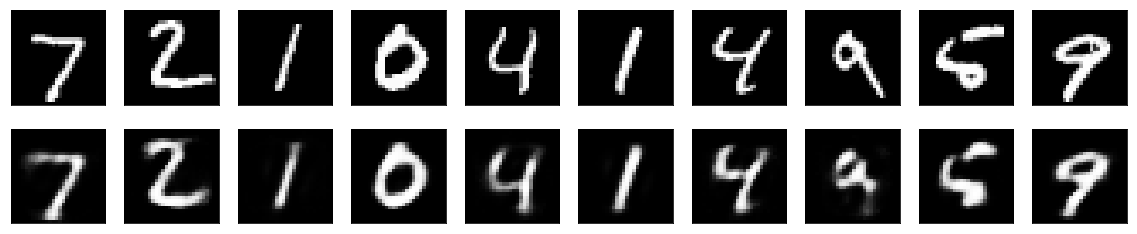

In [10]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()